In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from numpy import array
from numpy import hstack
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import utils

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Import data

In [2]:
rawdata = pd.read_csv(r"dust_2018.csv", encoding = 'cp949')

In [3]:
rawdata.head()

,City_code,City,Place,Time,PM_10,PM_2.5
0,41110,수원시,경수대로,2019-01-01,47,27
1,41110,수원시,광교동,2019-01-01,37,23
2,41110,수원시,영통동,2019-01-01,40,23
3,41110,수원시,인계동,2019-01-01,37,23
4,41110,수원시,천천동,2019-01-01,39,21


In [4]:
in_seq1 = array(rawdata["PM_10"])
in_seq2 = array(rawdata["PM_2.5"])

In [5]:
len(in_seq1)

45979

In [6]:
np.random.seed(902)

# 3. Data preprocessing

In [7]:
n_steps = 6
n_features = 1

In [8]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [9]:
x_pm10, y_pm10 = split_sequence(in_seq1, n_steps)

print(x_pm10.shape, y_pm10.shape)

(45973, 6) (45973,)


In [10]:
x_pm25, y_pm25 = split_sequence(in_seq2, n_steps)

print(x_pm25.shape, y_pm25.shape)

(45973, 6) (45973,)


In [11]:
x_pm10 = x_pm10.astype('int32')

In [12]:
x_pm10 = x_pm10.reshape((x_pm10.shape[0], x_pm10.shape[1], n_features))
x_pm25 = x_pm25.reshape((x_pm25.shape[0], x_pm25.shape[1], n_features))

In [13]:
x_pm10

array([[[47],
        [37],
        [40],
        [37],
        [39],
        [43]],

       [[37],
        [40],
        [37],
        [39],
        [43],
        [51]],

       [[40],
        [37],
        [39],
        [43],
        [51],
        [35]],

       ...,

       [[36],
        [36],
        [35],
        [42],
        [30],
        [29]],

       [[36],
        [35],
        [42],
        [30],
        [29],
        [35]],

       [[35],
        [42],
        [30],
        [29],
        [35],
        [31]]])

In [14]:
y_pm10 = y_pm10.astype('int32')

# 4. RNN-LSTM modeling

In [15]:
model = Sequential()
model.add(LSTM(240, activation='relu',input_shape=(n_steps,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
hist = model.fit(x_pm10, y_pm10, 
                 epochs=500,
                 batch_size=256, 
                 verbose = 1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
45973/45973 [==============================] - 39s 853us/sample - loss: 178.7757
Epoch 2/500
45973/45973 [==============================] - 24s 523us/sample - loss: 116.5784
Epoch 3/500
45973/45973 [==============================] - 27s 589us/sample - loss: 116.1239
Epoch 4/500
45973/45973 [==============================] - 29s 637us/sample - loss: 115.5186
Epoch 5/500
45973/45973 [==============================] - 23s 505us/sample - loss: 114.3232 - loss: 1
Epoch 6/500
45973/45973 [==============================] - 21s 458us/sample - loss: 113.8108 - loss: 113.185 - E
Epoch 7/500
45973/45973 [==============================] - 24s 517us/sample - loss: 113.2120
Epoch 8/500
45973/45973 [==============================] - 19s 418us/sample - loss: 116.0903
Epoch 9/500
45973/45973 [==============================] -

45973/45973 [==============================] - 25s 553us/sample - loss: 100.1646
Epoch 165/500
45973/45973 [==============================] - 25s 541us/sample - loss: 99.6845
Epoch 166/500
45973/45973 [==============================] - 25s 543us/sample - loss: 99.0149
Epoch 167/500
45973/45973 [==============================] - 25s 555us/sample - loss: 99.8442
Epoch 168/500
45973/45973 [==============================] - 25s 542us/sample - loss: 99.9341
Epoch 169/500
45973/45973 [==============================] - 25s 542us/sample - loss: 99.1705
Epoch 170/500
45973/45973 [==============================] - 25s 549us/sample - loss: 99.8930
Epoch 171/500
45973/45973 [==============================] - 30s 656us/sample - loss: 101.2321
Epoch 172/500
45973/45973 [==============================] - 26s 569us/sample - loss: 100.2992
Epoch 173/500
45973/45973 [==============================] - 27s 579us/sample - loss: 101.3932
Epoch 174/500
45973/45973 [==============================] - 31s 673us

45973/45973 [==============================] - 18s 388us/sample - loss: 94.2703
Epoch 337/500
45973/45973 [==============================] - 17s 378us/sample - loss: 92.1621
Epoch 338/500
45973/45973 [==============================] - 19s 409us/sample - loss: 93.5277
Epoch 339/500
45973/45973 [==============================] - 18s 393us/sample - loss: 92.3468
Epoch 340/500
45973/45973 [==============================] - 18s 385us/sample - loss: 91.3179
Epoch 341/500
45973/45973 [==============================] - 18s 389us/sample - loss: 90.8640
Epoch 342/500
45973/45973 [==============================] - 19s 414us/sample - loss: 91.2605
Epoch 343/500
45973/45973 [==============================] - 18s 390us/sample - loss: 90.9119
Epoch 344/500
45973/45973 [==============================] - 19s 406us/sample - loss: 90.2112
Epoch 345/500
45973/45973 [==============================] - 18s 387us/sample - loss: 90.2518
Epoch 346/500
45973/45973 [==============================] - 19s 414us/sam

45973/45973 [==============================] - 19s 403us/sample - loss: 93.3777
Epoch 424/500
45973/45973 [==============================] - 18s 386us/sample - loss: 93.0758
Epoch 425/500
45973/45973 [==============================] - 19s 412us/sample - loss: 90.5201
Epoch 426/500
45973/45973 [==============================] - 17s 379us/sample - loss: 90.1194
Epoch 427/500
45973/45973 [==============================] - 19s 415us/sample - loss: 90.4072
Epoch 428/500
45973/45973 [==============================] - 18s 384us/sample - loss: 92.6195
Epoch 429/500
45973/45973 [==============================] - 18s 394us/sample - loss: 94.8674
Epoch 430/500
45973/45973 [==============================] - 18s 393us/sample - loss: 91.2902
Epoch 431/500
45973/45973 [==============================] - 18s 389us/sample - loss: 90.0234
Epoch 432/500
45973/45973 [==============================] - 19s 408us/sample - loss: 89.1287
Epoch 433/500
45973/45973 [==============================] - 18s 393us/sam

In [1]:
plt.plot(hist.history['loss'])
plt.ylim(0.0, 100.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.set_ylim([0,200])
plt.legend(['pm10'], loc='upper right')
plt.show()

AttributeError: 'function' object has no attribute 'history'

In [17]:
model.save("RNN_LSTM.h5")
print("Saved")

Saved


## Predict PM2.5, PM10

In [19]:
CC = pd.read_csv('cheoncheon.csv', encoding = 'cp949')
DT = pd.read_csv('dongtan.csv', encoding = 'cp949')
GD = pd.read_csv('gsdaero.csv', encoding = 'cp949')
GG = pd.read_csv('gwanggyo.csv', encoding = 'cp949')
IG = pd.read_csv('ingye.csv', encoding = 'cp949')
YT = pd.read_csv('yeongtong.csv', encoding = 'cp949')

In [20]:
in_seqCC = array(CC["PM_10"])
in_seqDT = array(DT["PM_10"])
in_seqGD = array(GD["PM_10"])
in_seqGG = array(GG["PM_10"])
in_seqIG = array(IG["PM_10"])
in_seqYT = array(YT["PM_10"])

In [21]:
x_CC, y_CC = split_sequence(in_seqCC, n_steps)
x_DT, y_DT = split_sequence(in_seqDT, n_steps)
x_GD, y_GD = split_sequence(in_seqGD, n_steps)
x_GG, y_GG = split_sequence(in_seqGG, n_steps)
x_IG, y_IG = split_sequence(in_seqIG, n_steps)
x_YT, y_YT = split_sequence(in_seqYT, n_steps)

In [22]:
x_CC = x_CC.reshape((x_CC.shape[0], x_CC.shape[1], n_features))
x_DT = x_DT.reshape((x_DT.shape[0], x_DT.shape[1], n_features))
x_GD = x_GD.reshape((x_GD.shape[0], x_GD.shape[1], n_features))
x_GG = x_GG.reshape((x_GG.shape[0], x_GG.shape[1], n_features))
x_IG = x_IG.reshape((x_IG.shape[0], x_IG.shape[1], n_features))
x_YT = x_YT.reshape((x_YT.shape[0], x_YT.shape[1], n_features))

In [23]:
yhat_CC = model.predict(x_CC)
yhat_DT = model.predict(x_DT)
yhat_GD = model.predict(x_GD)
yhat_GG = model.predict(x_GG)
yhat_IG = model.predict(x_IG)
yhat_YT = model.predict(x_YT)

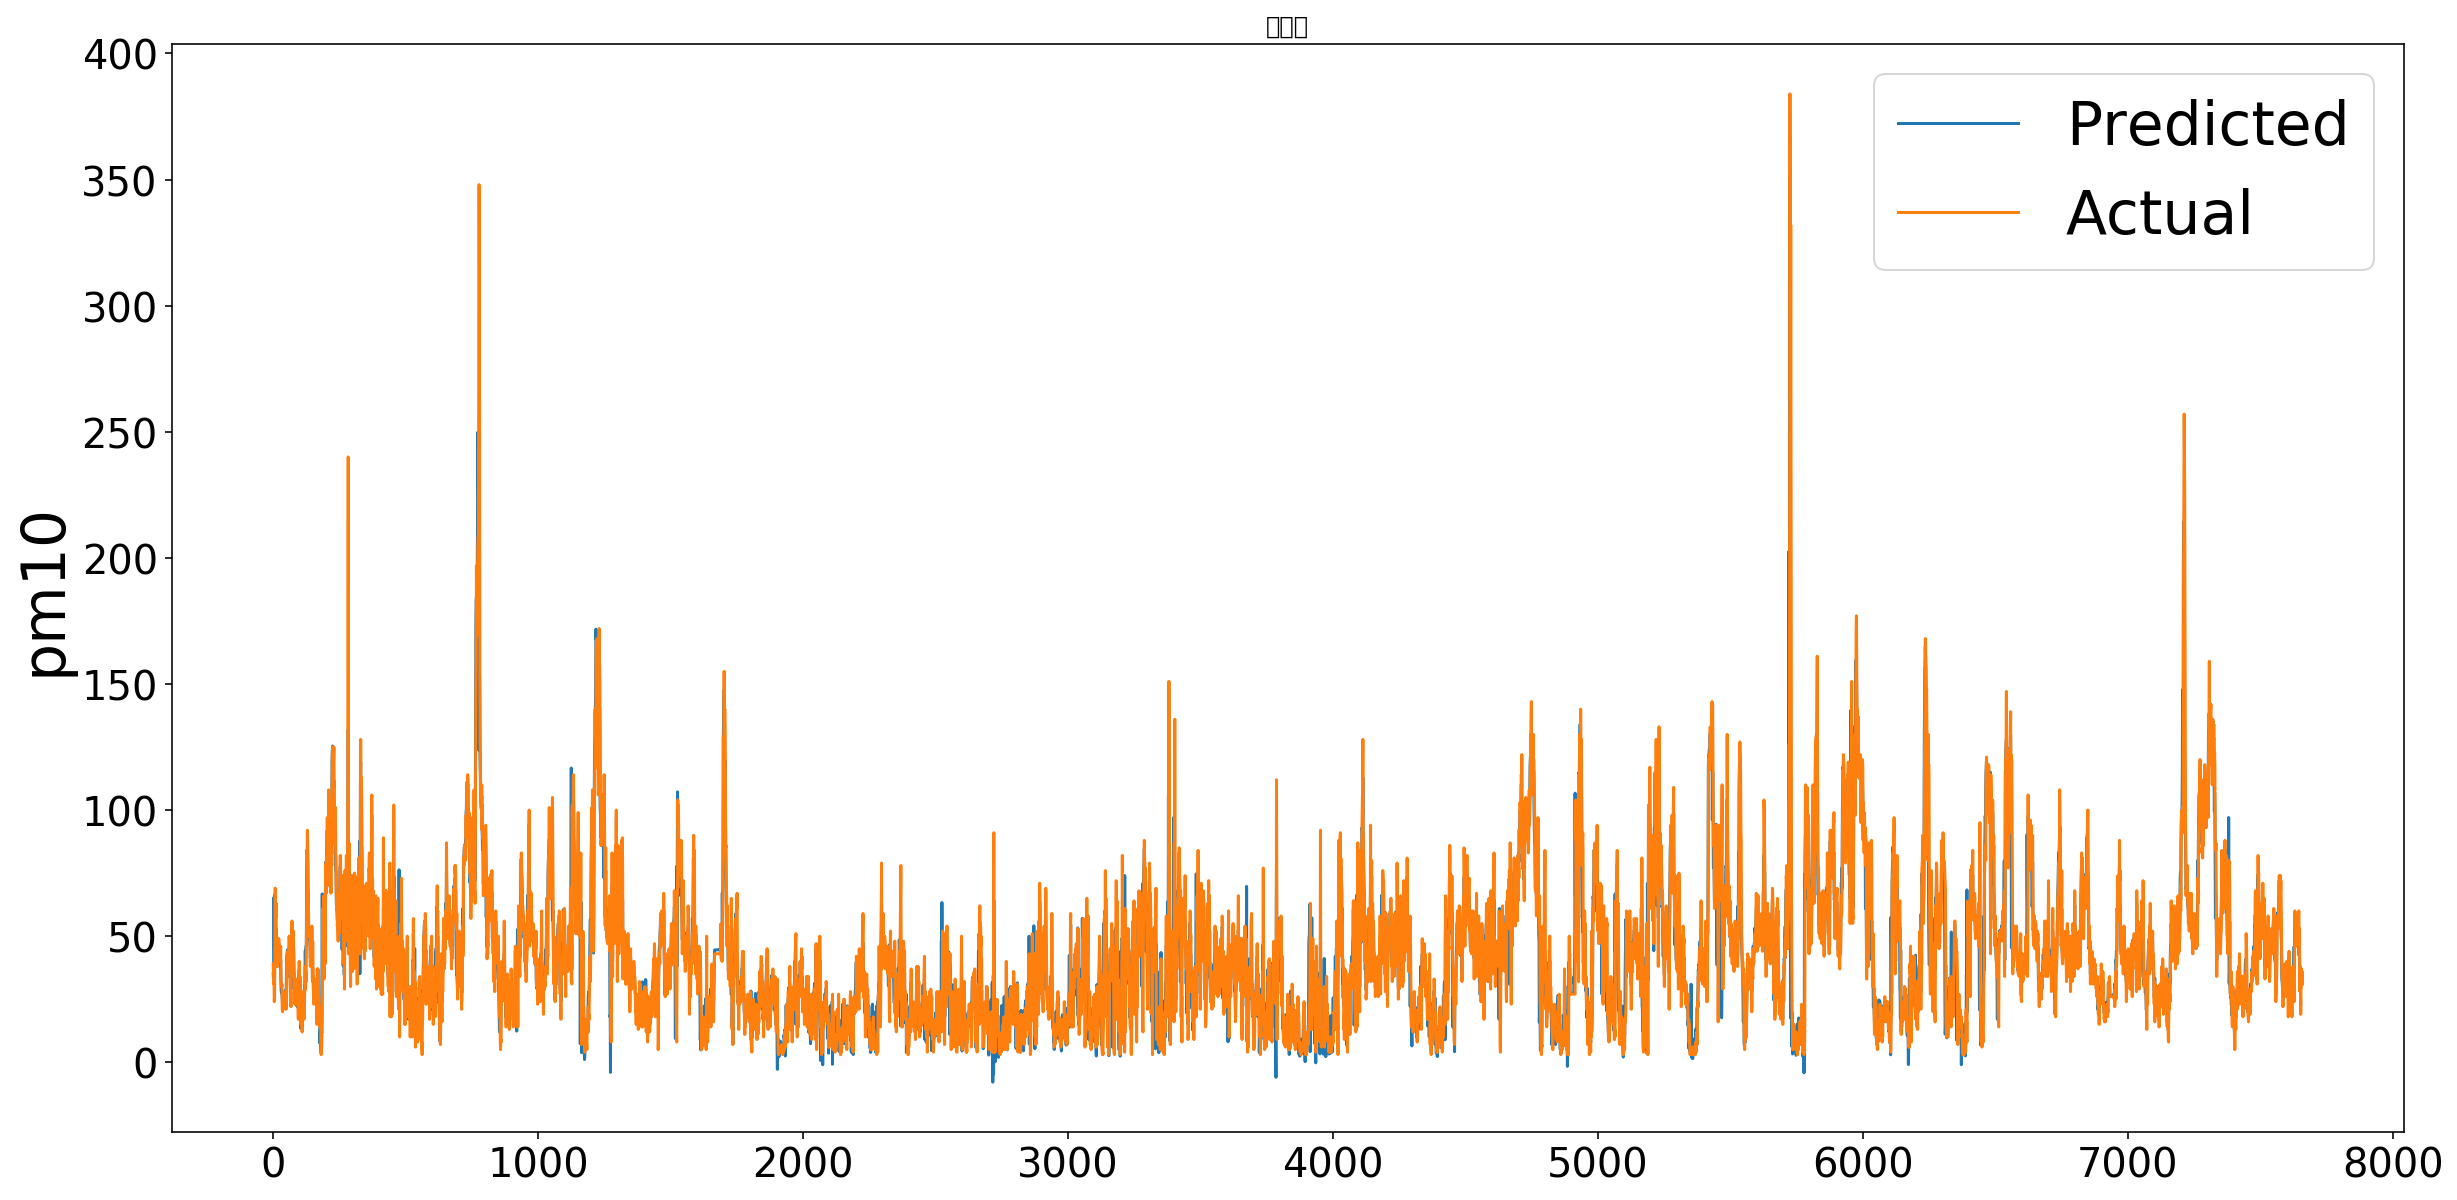

In [31]:
plt.figure(figsize=(20,10))
plt.plot(yhat_CC)
plt.plot(in_seqCC)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 30)

plt.title('천천동')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()

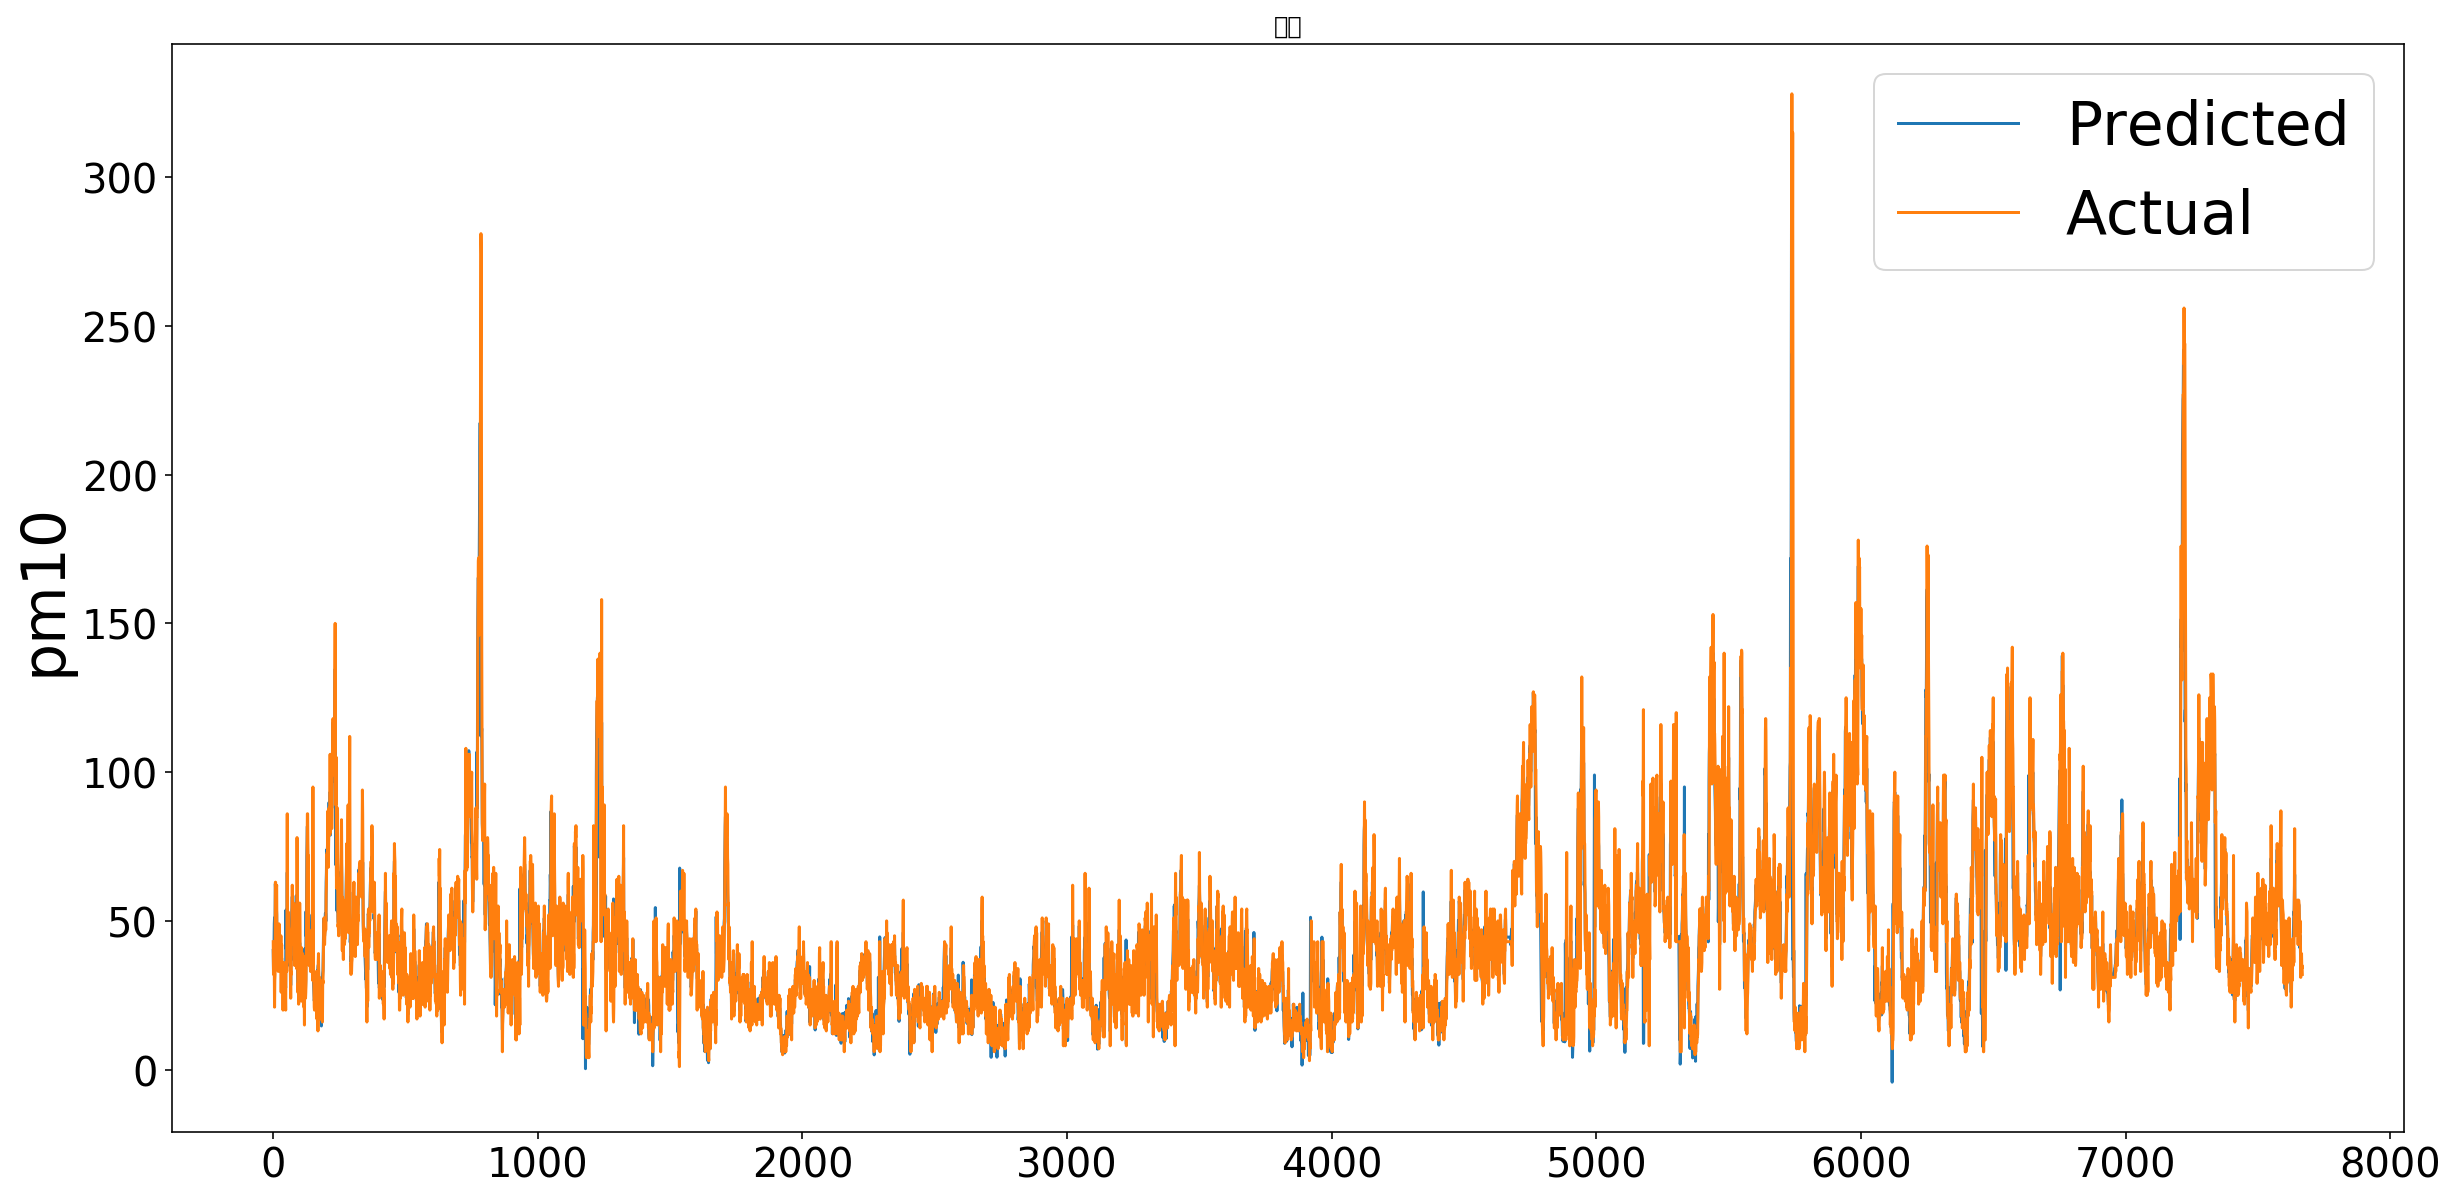

In [32]:
plt.figure(figsize=(20,10))
plt.plot(yhat_DT)
plt.plot(in_seqDT)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 30)

plt.title('동탄')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()

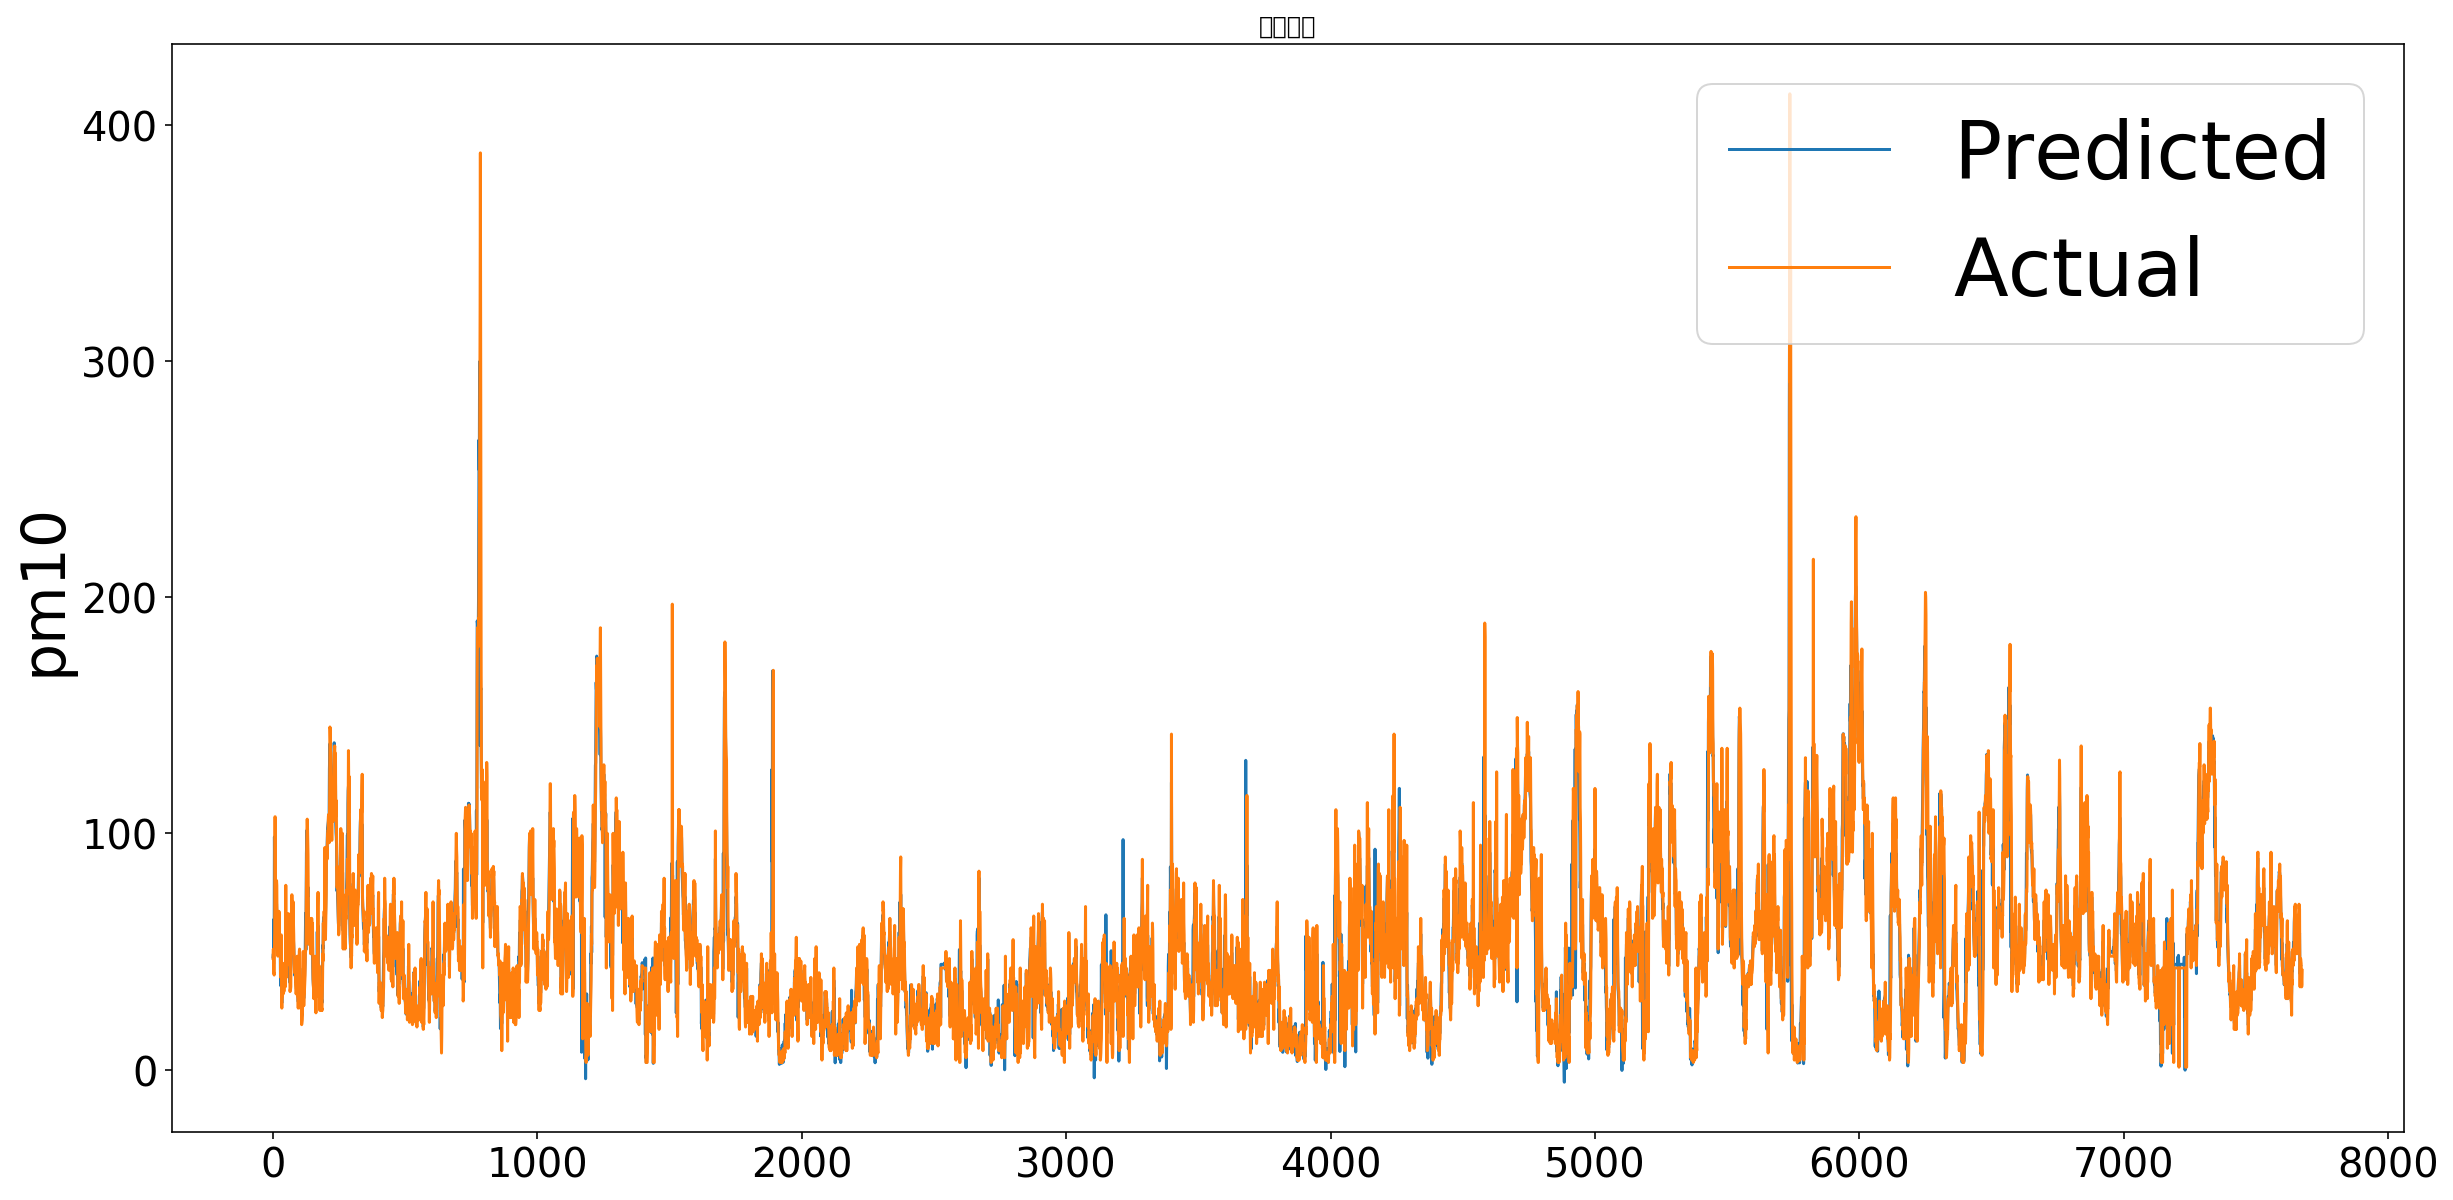

In [33]:
plt.figure(figsize=(20,10))
plt.plot(yhat_GD)
plt.plot(in_seqGD)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 40)

plt.title('경수대로')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()

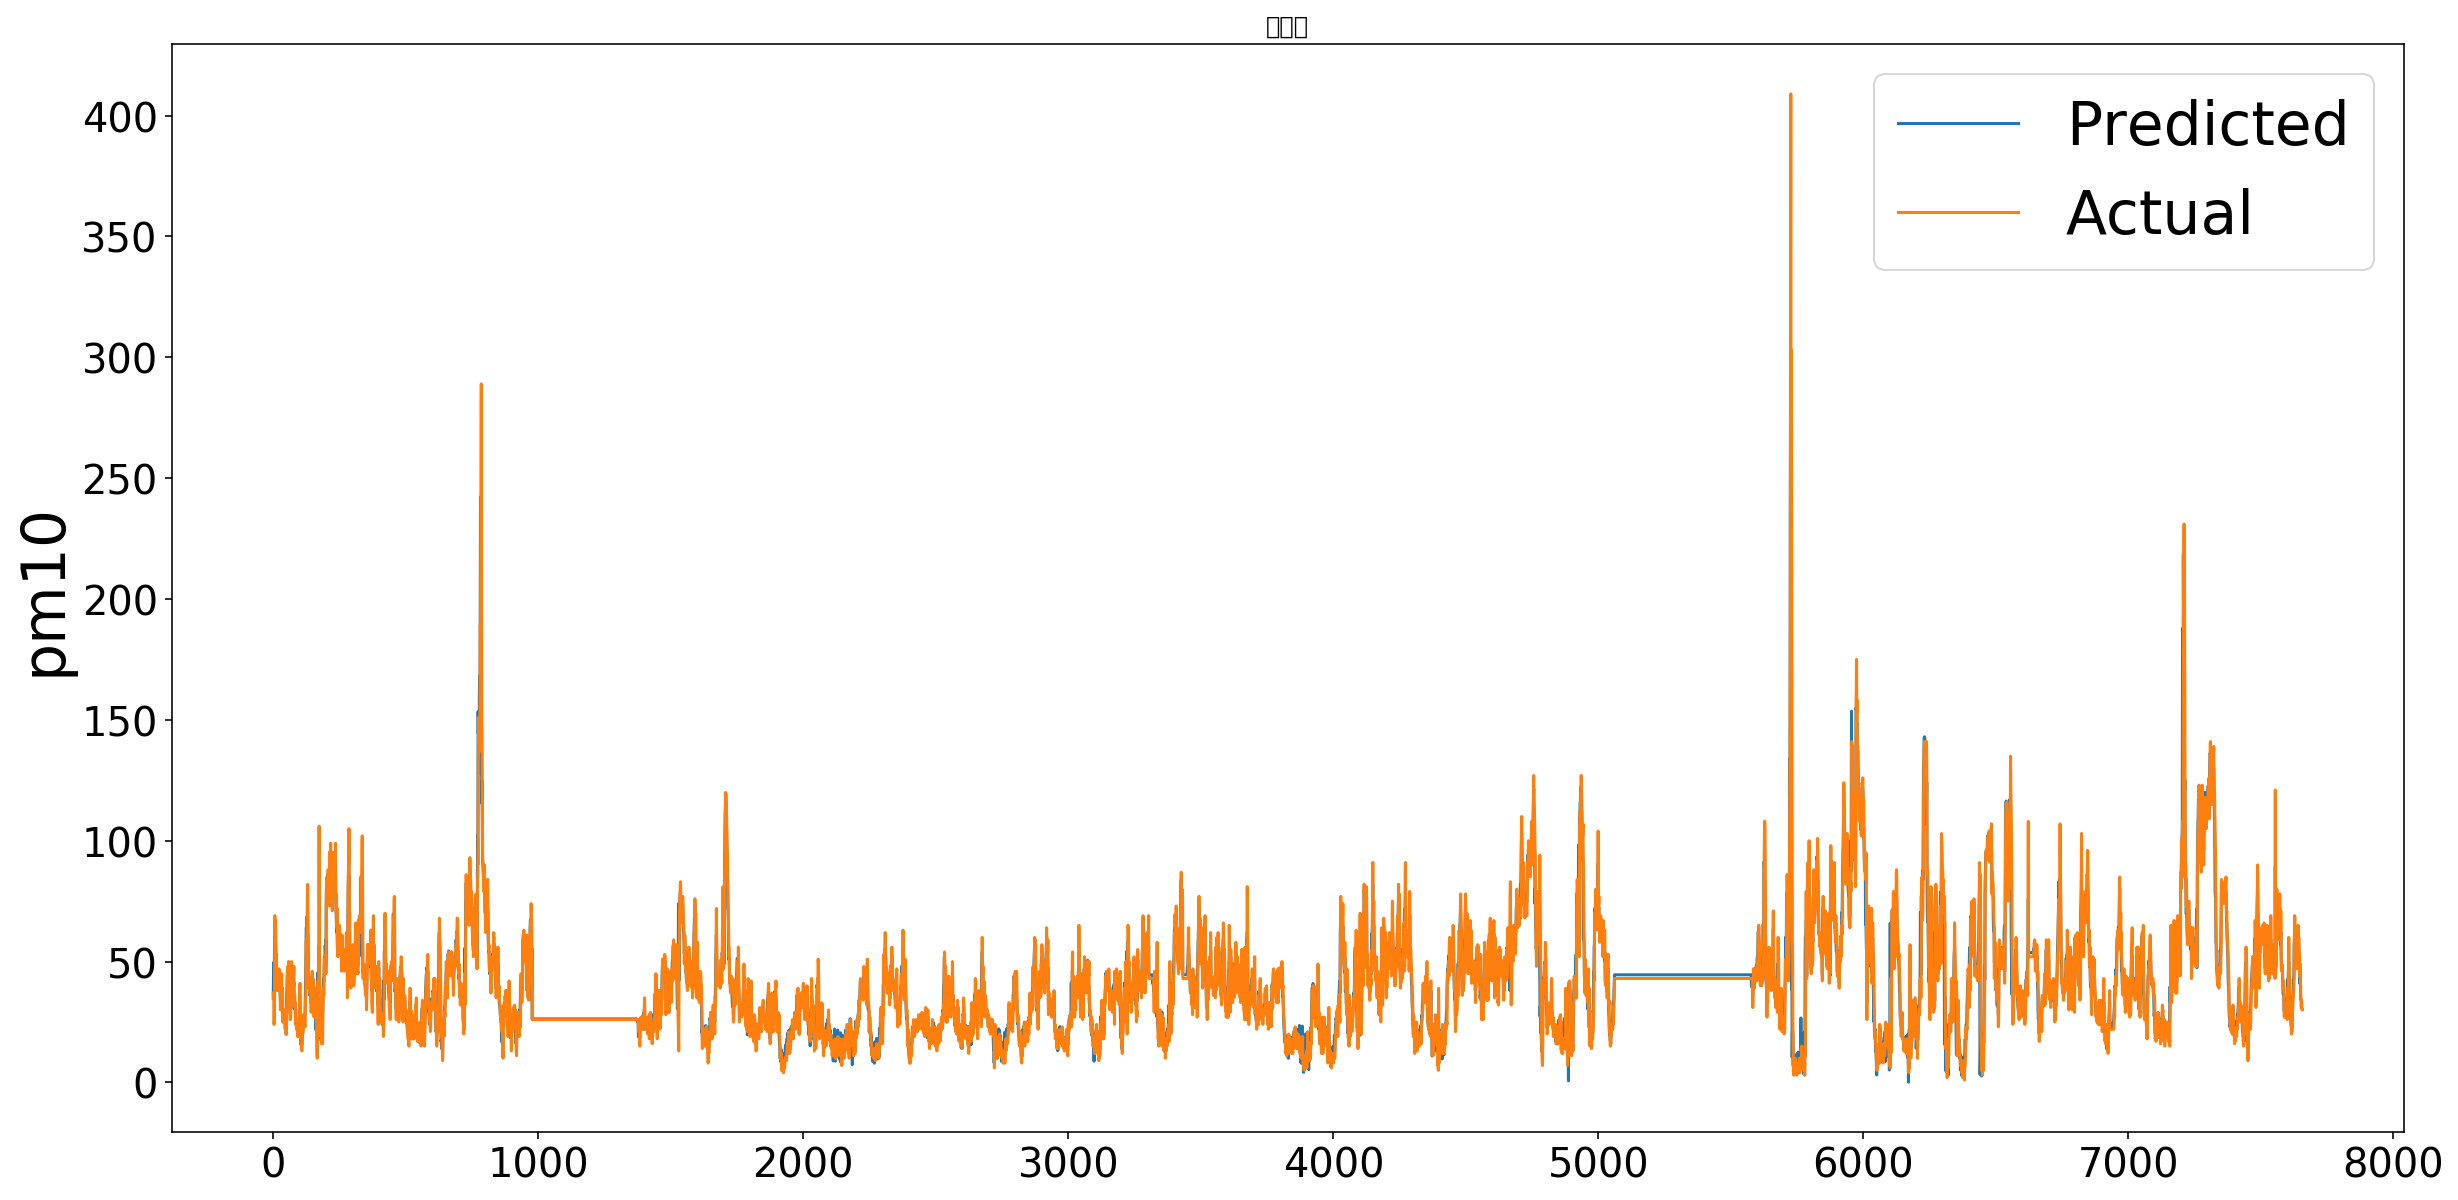

In [34]:
plt.figure(figsize=(20,10))
plt.plot(yhat_GG)
plt.plot(in_seqGG)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 30)

plt.title('광교동')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()

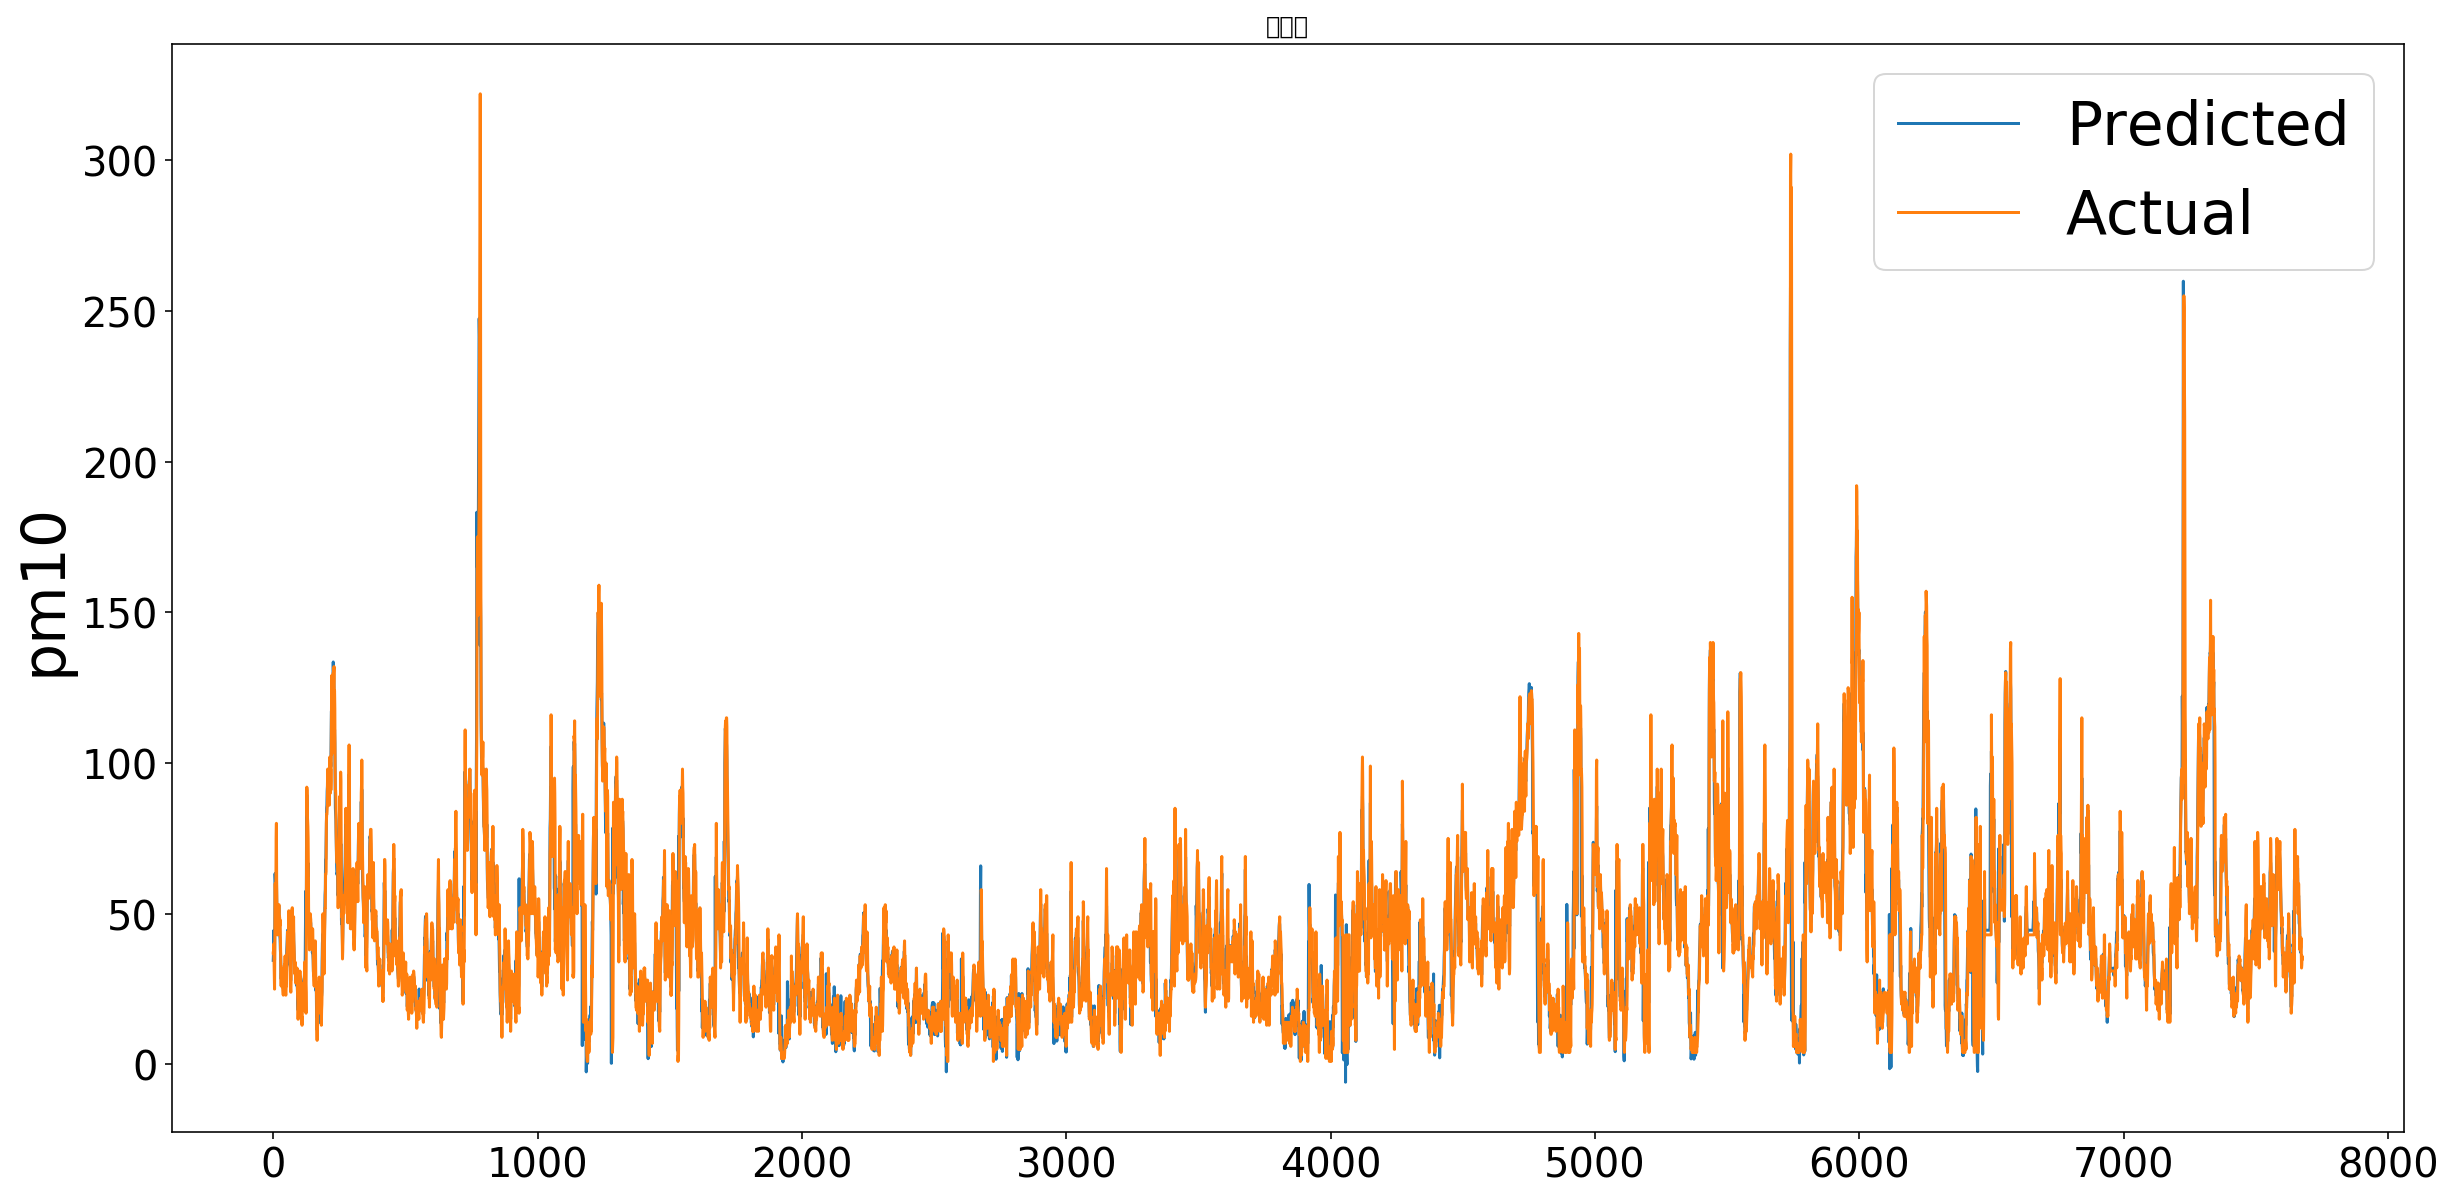

In [35]:
plt.figure(figsize=(20,10))
plt.plot(yhat_IG)
plt.plot(in_seqIG)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 30)

plt.title('인계동')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()

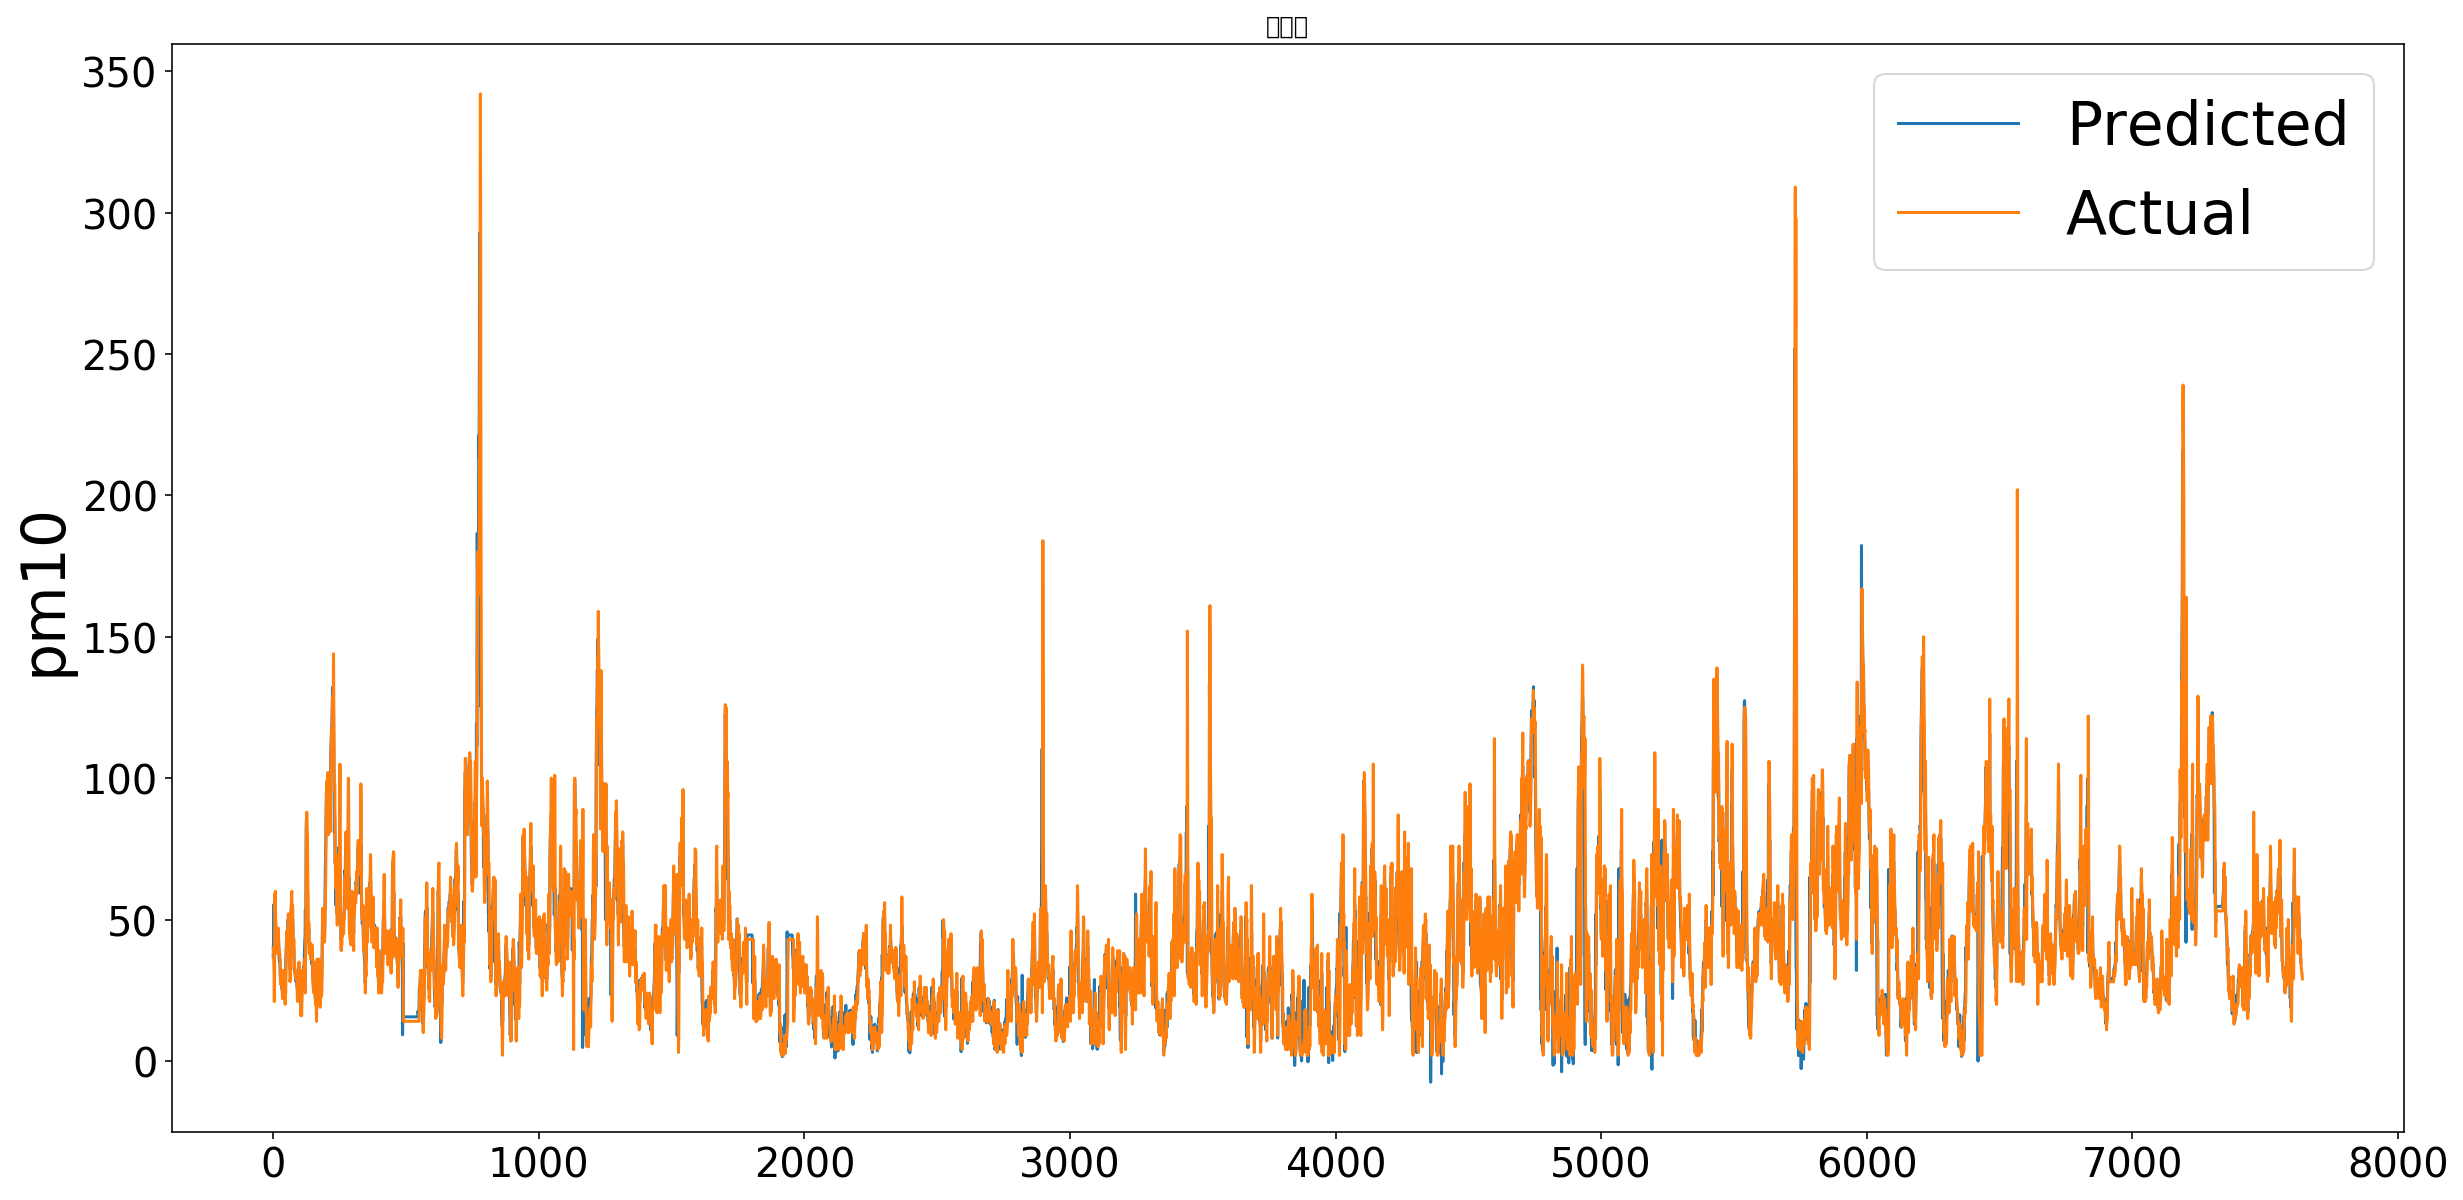

In [36]:
plt.figure(figsize=(20,10))
plt.plot(yhat_YT)
plt.plot(in_seqYT)
plt.legend(['Predicted', 'Actual'], loc='upper right', fontsize = 30)

plt.title('영통동')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('pm10', fontsize = 30)
plt.show()